In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
import warnings
warnings.filterwarnings('ignore')


In [292]:
data = pd.read_csv('Bengaluru_House_Data.csv')

In [293]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [294]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [295]:
data.shape

(13320, 9)

In [296]:
data.duplicated().sum()

529

* There are 529 repeated data

In [297]:
data.drop_duplicates(keep='first',inplace=True)
data.reset_index(drop=True,inplace=True)

* Deleted the duplicated data keeping the first data for for duplicates one.

In [298]:
data.duplicated().sum()

0

In [299]:
data.shape

(12791, 9)

In [300]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12791 entries, 0 to 12790
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  object 
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(3), object(6)
memory usage: 899.5+ KB


In [302]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [303]:
data['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [304]:
data['location'].unique()
len(data['location'].unique())

1306

In [305]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [306]:
data['society'].unique()
len(data['society'].unique())

2689

In [307]:
data['total_sqft'].unique()
len(data['total_sqft'].unique())

2117

In [308]:
data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [309]:
data['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [310]:
data['price'].unique()
len(data['price'].unique())

1994

In [311]:
data['area_type'].value_counts()

area_type
Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: count, dtype: int64

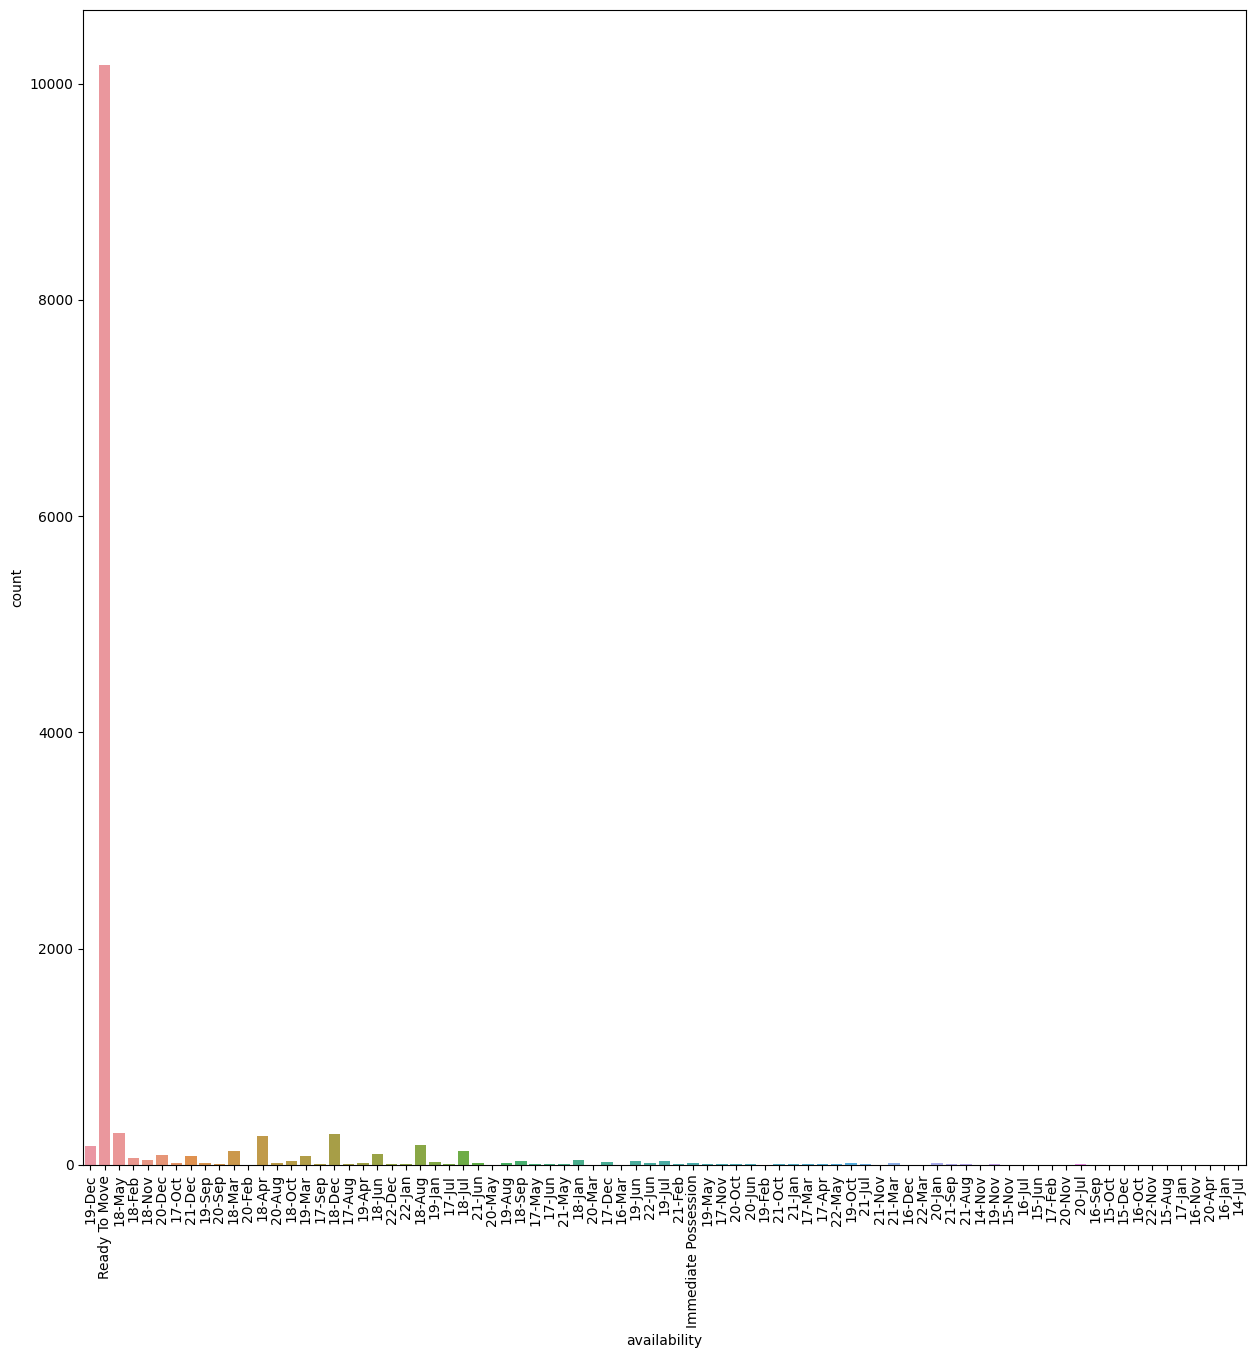

In [312]:
plt.figure(figsize=(15,15))
sns.countplot(data=data,x='availability')
plt.xticks(rotation=90)
plt.show()

* Most of the house in dataset are ready to move with 10172 datapoints

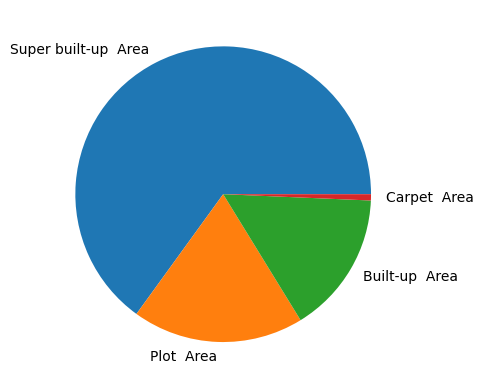

In [313]:
plt.pie(data['area_type'].value_counts(),labels=data['area_type'].unique())
plt.xticks(rotation=90)
plt.show()

* In the dataset most of the houses, (8317) houses are in Super-built up area.

In [314]:
data['location'].value_counts()

location
Whitefield                        523
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

* We have maximum number of data for houses in Whitefield location 523.

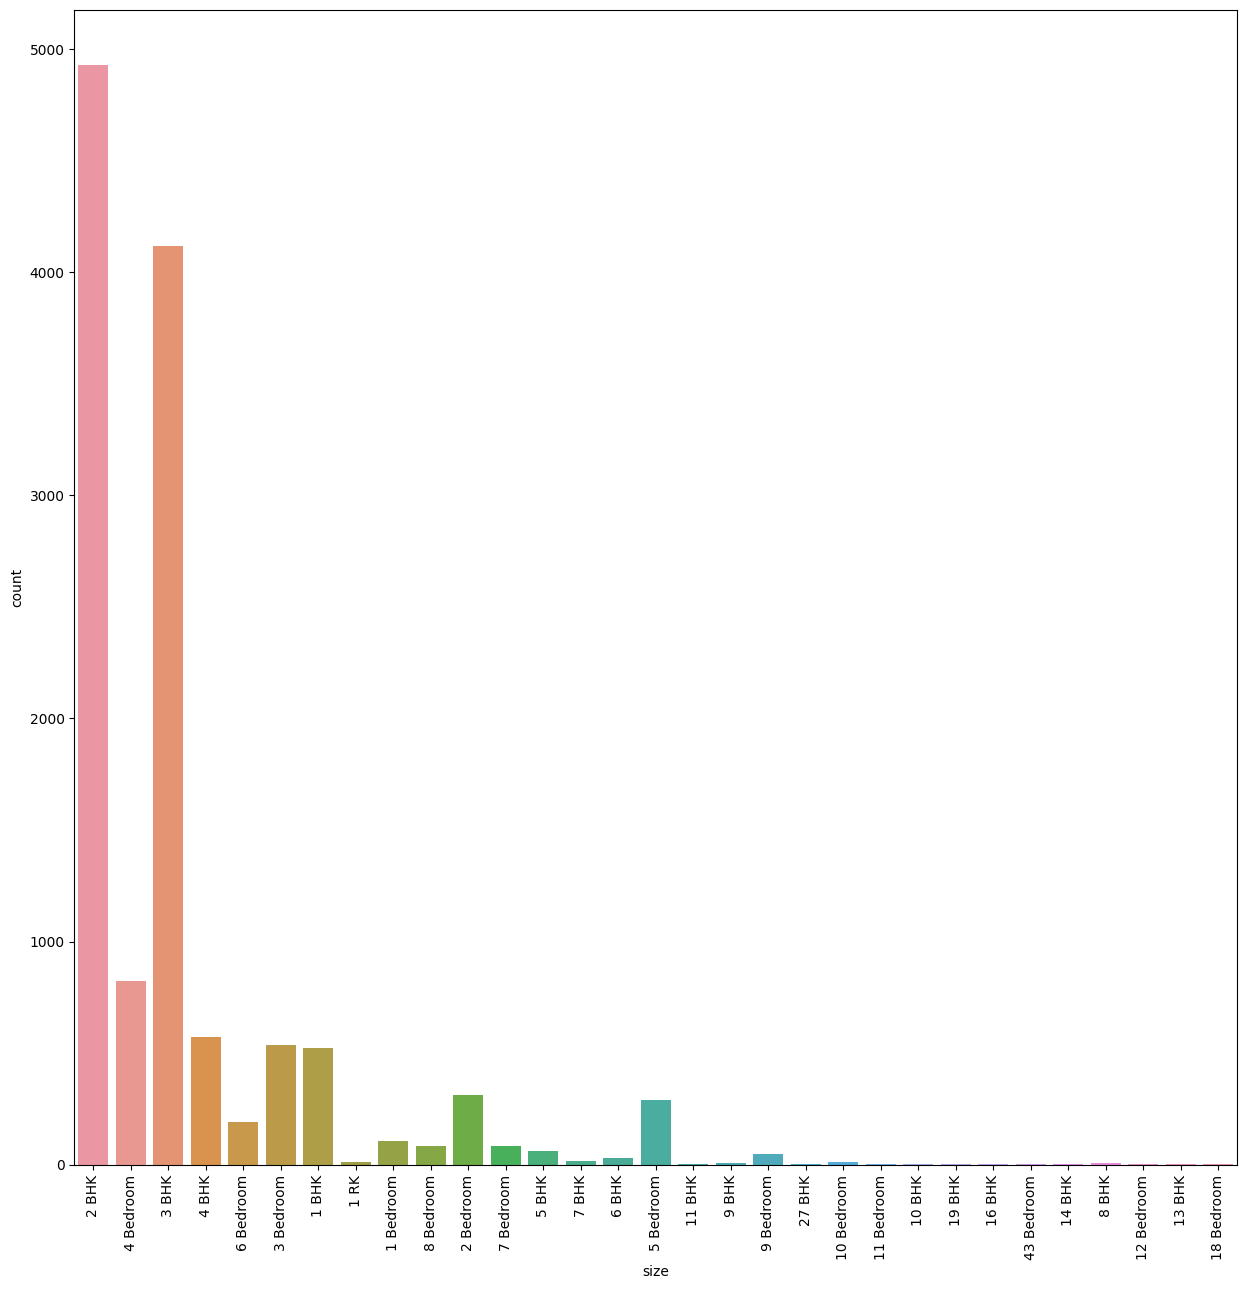

In [315]:
plt.figure(figsize=(15,15))
sns.countplot(data=data,x='size')
plt.xticks(rotation=90)
plt.show()

* Most of the houses in dataset are 2BHK or 3BK

In [272]:
data['society'].value_counts()

society
GrrvaGr    68
PrarePa    63
Sryalan    56
Prtates    54
GMown E    52
           ..
AcisePa     1
Madener     1
Siilka      1
Tepleee     1
RSntsAp     1
Name: count, Length: 2688, dtype: int64

In [316]:
data['total_sqft'].value_counts()

total_sqft
1200           808
1100           210
1500           202
2400           196
600            178
              ... 
2563 - 2733      1
2005             1
605 - 624        1
4260 - 4408      1
4689             1
Name: count, Length: 2117, dtype: int64

* Max number of houses in dataset are 1200 sq.ft which is 808

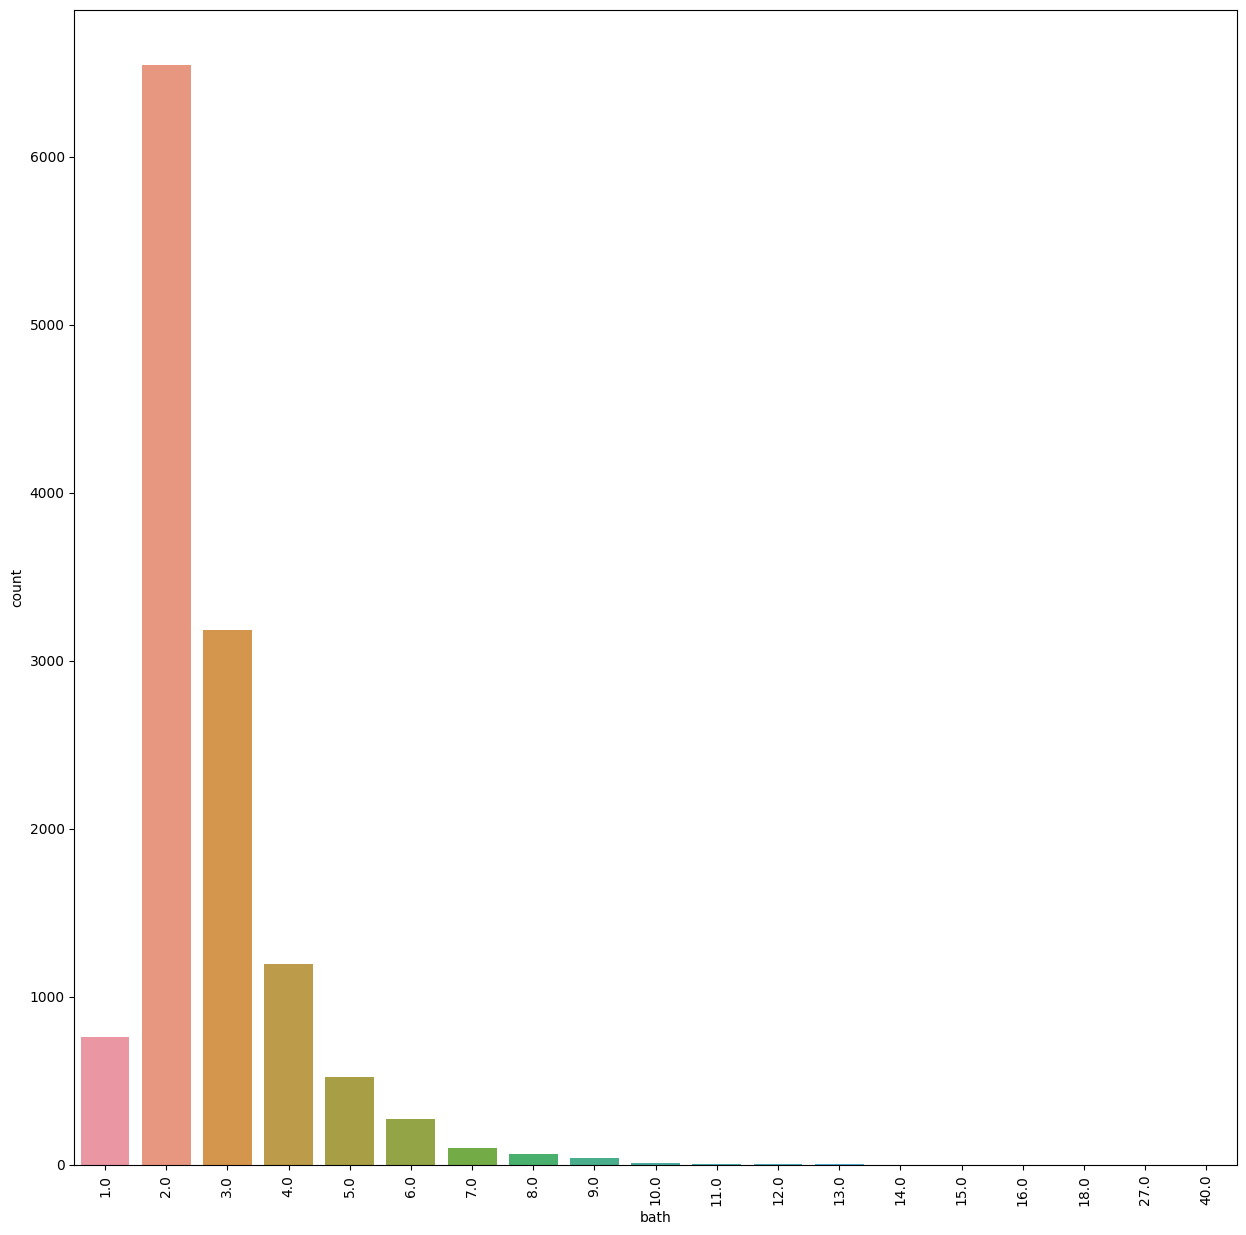

In [317]:
plt.figure(figsize=(15,15))
sns.countplot(data=data,x='bath')
plt.xticks(rotation=90)
plt.show()

In [275]:
data['bath'].value_counts()

bath
2.0     6546
3.0     3180
4.0     1198
1.0      762
5.0      520
6.0      271
7.0      102
8.0       64
9.0       42
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

* Max number of house in dataset has 2 bathroom which are  6546.

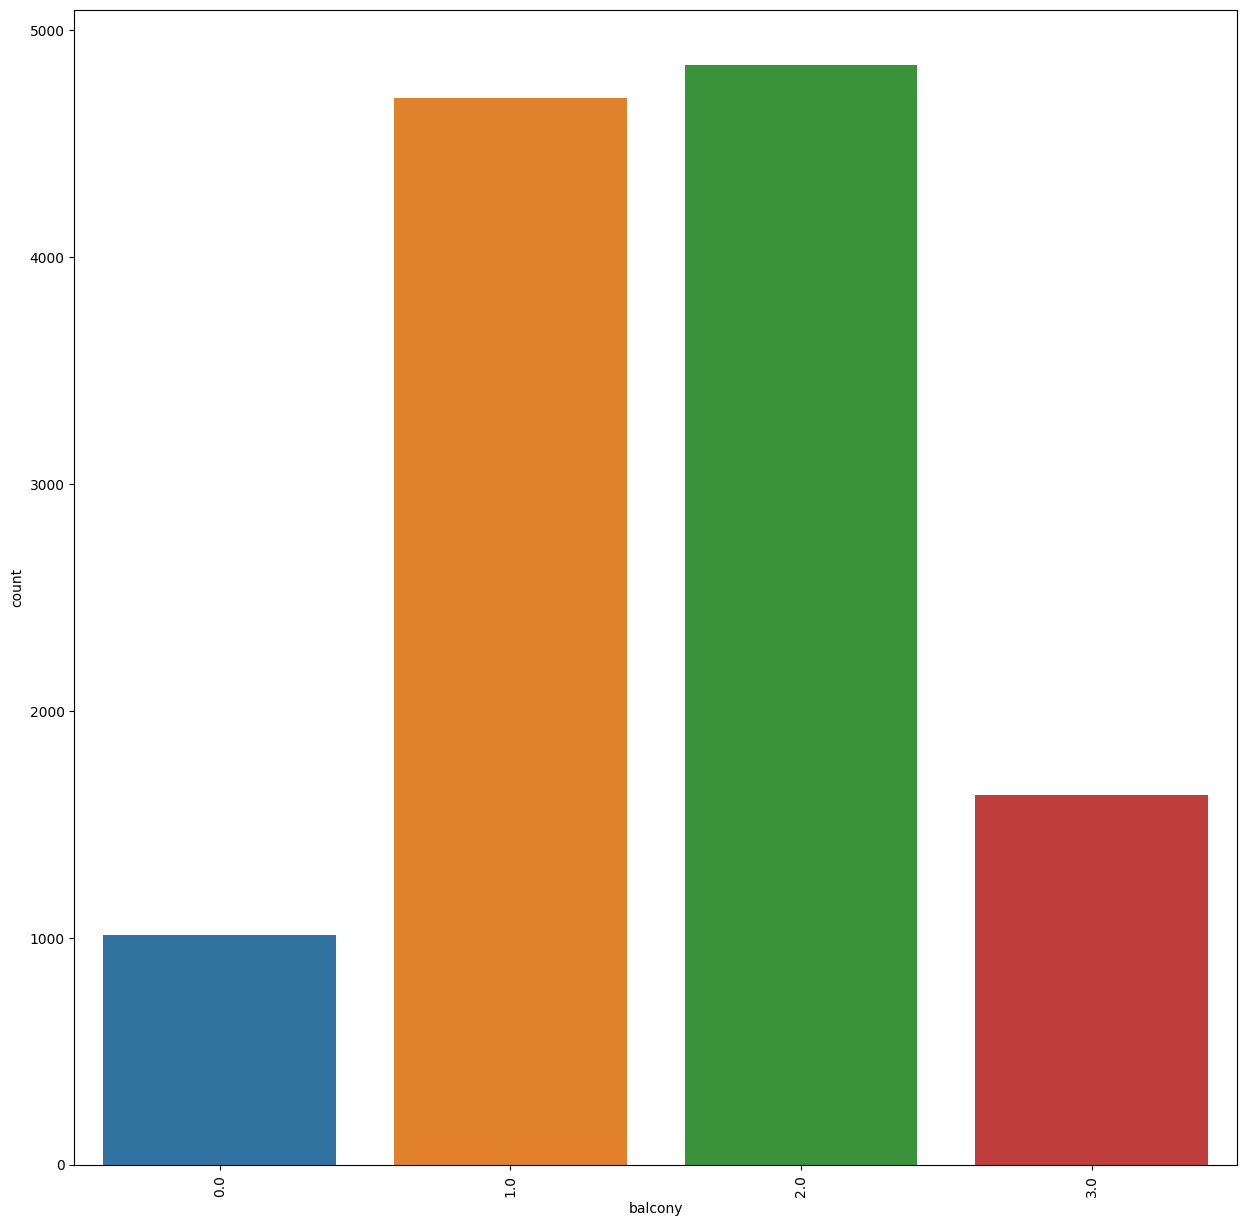

In [318]:
plt.figure(figsize=(15,15))
sns.countplot(data=data,x='balcony')
plt.xticks(rotation=90)
plt.show()

In [319]:
data['balcony'].value_counts()

balcony
2.0    4846
1.0    4700
3.0    1630
0.0    1010
Name: count, dtype: int64

* Most of the houses in dataset has 2 or 1 balcony

In [320]:
data['price'].value_counts()

price
75.00     300
65.00     296
55.00     265
60.00     263
45.00     231
         ... 
40.98       1
27.54       1
84.95       1
63.98       1
488.00      1
Name: count, Length: 1994, dtype: int64

In [321]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [322]:
data[data['location'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [323]:
data[data['society'] == 'Grare S']['location']

568             NaN
11785    Anantapura
Name: location, dtype: object

* There is one missin value in 'location' column index = 586, for that location i have society name which is Grare S and same there is another datapoint index = 11785 with same society name and location : Anantapura. There is high chance that missing value of location is Annantapura but i am not sure. Therefore we will drop this feild.

In [324]:
data.drop(index=[568],inplace=True)
data.reset_index(drop=True,inplace=True)

In [325]:
data.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

* We will drop society column since it has 5328 missing values 

In [326]:
data.drop(columns='society',inplace = True)

In [327]:
data.isnull().sum()

area_type         0
availability      0
location          0
size             16
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

In [328]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12790 entries, 0 to 12789
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12790 non-null  object 
 1   availability  12790 non-null  object 
 2   location      12790 non-null  object 
 3   size          12774 non-null  object 
 4   total_sqft    12790 non-null  object 
 5   bath          12717 non-null  float64
 6   balcony       12185 non-null  float64
 7   price         12790 non-null  float64
dtypes: float64(3), object(5)
memory usage: 799.5+ KB


* The 'total_sqft' column in data set contains data in different format such as yard,sqmeter,parce and so on.. To deal with these, those datapoint wwhich where in number fomat i keep it as itis, those were in the range format if took mean of them and those whixh where in different unit i droped those datapoints as they were less in number (46).

In [329]:

update = []
for i in data['total_sqft']:
    try:
        update.append(float(i))
    except:
        j = i.split(' ')
        if len(j) == 3:
             mean = (float(j[0])+float(j[2]))/2
             update.append(mean)
        else:
            update.append('NF')

In [331]:
data.drop(index = data[data['total_sqft'] == 'NF'].index,inplace=True)
data.reset_index(drop=True,inplace = True)

In [330]:
data['total_sqft'] = update

In [332]:
data['total_sqft'] = data['total_sqft'].astype(float)

<function matplotlib.pyplot.show(close=None, block=None)>

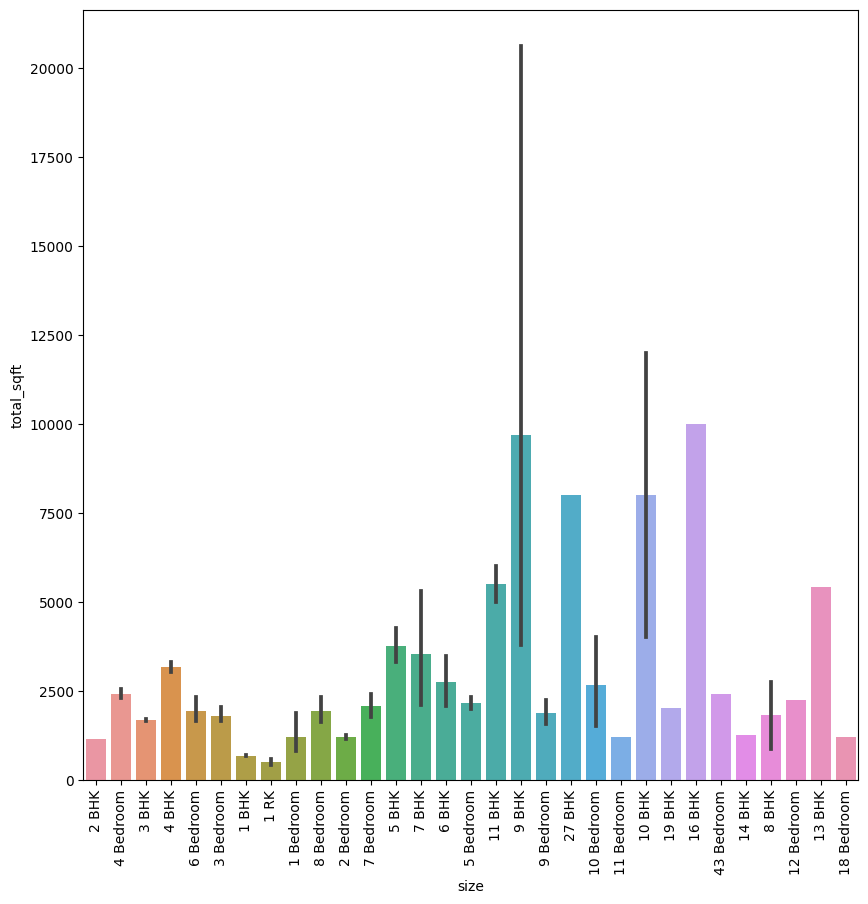

In [333]:
plt.figure(figsize=(10,10))
sns.barplot(data=data,x='size',y='total_sqft')
plt.xticks(rotation=90)
plt.show

In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12744 entries, 0 to 12743
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12744 non-null  object 
 1   availability  12744 non-null  object 
 2   location      12744 non-null  object 
 3   size          12728 non-null  object 
 4   total_sqft    12744 non-null  float64
 5   bath          12671 non-null  float64
 6   balcony       12143 non-null  float64
 7   price         12744 non-null  float64
dtypes: float64(4), object(4)
memory usage: 796.6+ KB


In [335]:
data[data['size'].isnull()]
        

,area_type,availability,location,size,total_sqft,bath,balcony,price
577,Plot Area,Immediate Possession,Sarjapur Road,NaN,1800.0,NaN,NaN,34.185
1756,Plot Area,Immediate Possession,IVC Road,NaN,3817.0,NaN,NaN,124.000
2240,Plot Area,Immediate Possession,Banashankari,NaN,2400.0,NaN,NaN,460.000
2771,Plot Area,Immediate Possession,Sarjapur Road,NaN,1800.0,NaN,NaN,28.785
2823,Plot Area,Immediate Possession,Devanahalli,NaN,1950.0,NaN,NaN,46.800
5228,Plot Area,Immediate Possession,Devanahalli,NaN,3752.5,NaN,NaN,177.115
6261,Plot Area,Immediate Possession,Whitefield,NaN,2324.0,NaN,NaN,26.730
6464,Plot Area,Immediate Possession,Jigani,NaN,1500.0,NaN,NaN,25.490
6545,Plot Area,Immediate Possession,Hoskote,NaN,1730.0,NaN,NaN,28.545
7465,Plot Area,Immediate Possession,Kasavanhalli,NaN,5000.0,NaN,NaN,400.000


* As we can see there are 16 missing values in size column and for that missing value the corressponding values for bath,balcony, is also missing. so its better to drop those fields

In [336]:
data.drop(index = data[data['size'].isnull()].index,inplace= True)
data.reset_index(drop=True,inplace=True)

In [337]:
data[data['size'].isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price


In [338]:
data.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath             57
balcony         585
price             0
dtype: int64

In [339]:
data[data['bath'].isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3210.0,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,3203.5,NaN,NaN,224.500
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,1630.0,NaN,NaN,74.820
344,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,525.0,NaN,NaN,21.530
665,Super built-up Area,18-Dec,JP Nagar,5 BHK,5520.0,NaN,NaN,375.000
698,Super built-up Area,18-Dec,JP Nagar,5 BHK,5600.0,NaN,NaN,548.500
796,Super built-up Area,18-Dec,JP Nagar,4 BHK,4624.5,NaN,NaN,453.000
935,Super built-up Area,Ready To Move,Whitefield,4 Bedroom,4348.5,NaN,NaN,304.000
1253,Built-up Area,18-May,Hennur,3 Bedroom,2264.0,NaN,NaN,155.000
1256,Super built-up Area,18-Jun,Yelahanka,3 BHK,1662.0,NaN,NaN,67.980


In [340]:
data.groupby('size').get_group('2 BHK')['bath'].mean()

1.9841592201462226

* We can see that average number of bath for house with 4 Bedroom is 4.
* We can see that average number of bath for house with 3 BHK is 3.
* We can see that average number of bath for house with 1 BHK is 1.
* We can see that average number of bath for house with 5 BHK is 5.
* We can see that average number of bath for house with 5 Bedroom is 5.
* We can see that average number of bath for house with 4 BHK is 4.
* We can see that average number of bath for house with 2 BHK is 2.

In [343]:
for i in data[data['bath'].isnull()].index:
    if data['size'][i] == "4 Bedroom":
        data['bath'][i] = 4
    elif data['size'][i] == "5 Bedroom":
        data['bath'][i] = 5
    elif data['size'][i] == "1 BHK":
        data['bath'][i] = 1
    elif data['size'][i] == "2 BHK":
        data['bath'][i] = 2
    elif data['size'][i] == "3 BHK":
        data['bath'][i] = 3
    elif data['size'][i] == "4 BHK":
        data['bath'][i] = 4
    elif data['size'][i] == "5 BHK":
        data['bath'][i] = 5
    

C:\Users\HP\AppData\Local\Temp\ipykernel_9224\1746464616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bath'][i] = 4
C:\Users\HP\AppData\Local\Temp\ipykernel_9224\1746464616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bath'][i] = 4
C:\Users\HP\AppData\Local\Temp\ipykernel_9224\1746464616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bath'][i] = 3
C:\Users\HP\AppData\Local\Temp\ipykernel_9224\17464

In [341]:
data['bath'][1253] = 3

C:\Users\HP\AppData\Local\Temp\ipykernel_9224\2636839392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bath'][1253] = 3


In [344]:
data[data['bath'].isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price


In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12728 entries, 0 to 12727
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12728 non-null  object 
 1   availability  12728 non-null  object 
 2   location      12728 non-null  object 
 3   size          12728 non-null  object 
 4   total_sqft    12728 non-null  float64
 5   bath          12728 non-null  float64
 6   balcony       12143 non-null  float64
 7   price         12728 non-null  float64
dtypes: float64(4), object(4)
memory usage: 795.6+ KB


In [347]:
data.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony         585
price             0
dtype: int64

In [348]:
data[data['balcony'].isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732.0,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300.0,4.0,NaN,600.00
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020.0,6.0,NaN,370.00
34,Built-up Area,Ready To Move,Kasturi Nagar,3 BHK,1925.0,3.0,NaN,125.00
40,Built-up Area,Ready To Move,Murugeshpalya,2 BHK,1296.0,2.0,NaN,81.00
...,...,...,...,...,...,...,...,...
12690,Plot Area,Ready To Move,Kundalahalli Colony,7 Bedroom,1400.0,7.0,NaN,218.00
12692,Plot Area,Ready To Move,Vishwanatha Nagenahalli,6 Bedroom,1200.0,5.0,NaN,130.00
12717,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,1200.0,5.0,NaN,325.00
12720,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,1675.0,3.0,NaN,92.13


<Axes: xlabel='balcony', ylabel='price'>

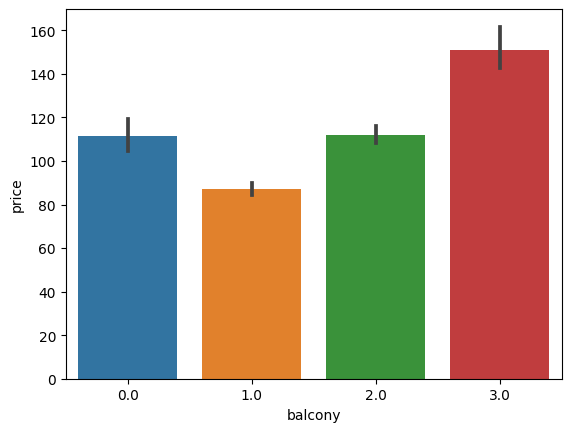

In [355]:
sns.barplot(data=data,x='balcony',y='price')

* We can observe that if the price of house is more than 115 there are more chance of having 3 balconies
* And if the price is less than 85 than chances of having 0 or 1 balconies is more

In [388]:
data[data['balcony'] == 0]['price'].mean()


111.58272500000001

In [387]:
data[data['balcony'] == 1]['price'].mean()

87.03667734358318

In [382]:
data[data['balcony'] == 2]['price'].mean()

111.84716532174632

In [389]:
data[data['balcony'] == 3]['price'].mean()

188.25145843703334

In [391]:
data[data['balcony'].isnull()]['price'].median()

83.3

 * We can observe that if the house has 3 balcony it's median price is 95

In [380]:
for i in data[data['balcony'].isnull()].index:
    if data['price'][i] >= 115:
        data['balcony'][i] = 3


In [381]:
data[data['balcony'].isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
40,Built-up Area,Ready To Move,Murugeshpalya,2 BHK,1296.0,2.0,NaN,81.00
146,Super built-up Area,Ready To Move,Kothanur,3 BHK,1828.0,3.0,NaN,110.00
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,1630.0,3.0,NaN,74.82
344,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,525.0,1.0,NaN,21.53
381,Built-up Area,Ready To Move,Mahadevpura,2 BHK,1451.0,2.0,NaN,90.00
...,...,...,...,...,...,...,...,...
12482,Super built-up Area,Ready To Move,Kenchenahalli,3 BHK,1720.0,3.0,NaN,100.00
12489,Super built-up Area,Ready To Move,Nehru Nagar,3 BHK,1674.0,3.0,NaN,81.00
12580,Super built-up Area,Ready To Move,Sarjapur Road,2 BHK,1340.0,2.0,NaN,75.00
12655,Super built-up Area,Ready To Move,Devanahalli,1 BHK,1075.0,1.0,NaN,52.57


In [395]:
data.drop(index=data[data["balcony"].isnull()].index,inplace=True)
data.reset_index(drop=True,inplace=True)

In [396]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [397]:
data.shape

(12525, 8)

In [30]:
data.to_csv('Bengaluru_House_Price_Updated.csv')

NameError: name 'data' is not defined

In [4]:
df = pd.read_csv('Bengaluru_House_Price_Updated.csv')

In [5]:
df.head()

,Unnamed: 0,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [6]:
df.drop(columns='Unnamed: 0',inplace=True)

In [7]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [8]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '10 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
size = []

for i in df['size']:
    if i == '1 RK':
        size.append(0)
    else:
       j =  i.split(' ')
       size.append(j[0])

In [10]:
df['No. of Bedrooms'] = size
df.drop(columns='size',inplace=True)


In [11]:

df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,No. of Bedrooms
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2


* I had tranform the size column to No. of bedrooms columns as Hall and kitchen is supposed to be 1 and no. of bedrooms differ
* If No. of bedrroms is 0 i means house is 1RK

In [12]:
df['No. of Bedrooms'].unique()

array(['2', '4', '3', '6', '1', 0, '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [96]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

* As there is ordinal relation between area_type as:
* Carpet Area < Built-up Area < Super built-up Area < Plot Area
* i ordinally encoded it:
* >> 'Carpet  Area' : 0,
* >> 'Built-up  Area' : 1,
* >> 'Super built-up  Area' : 2,
* >> 'Plot  Area' : 3

In [20]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Carpet  Area','Built-up  Area','Super built-up  Area','Plot  Area']])
area_type = encoder.fit_transform(df[['area_type']])

In [21]:
df['area_type'] = area_type

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12525 entries, 0 to 12524
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_type        12525 non-null  float64
 1   availability     12525 non-null  object 
 2   location         12525 non-null  object 
 3   total_sqft       12525 non-null  float64
 4   bath             12525 non-null  float64
 5   balcony          12525 non-null  float64
 6   price            12525 non-null  float64
 7   No. of Bedrooms  12525 non-null  object 
dtypes: float64(5), object(3)
memory usage: 782.9+ KB


In [24]:
df['No. of Bedrooms'] = df['No. of Bedrooms'].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12525 entries, 0 to 12524
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_type        12525 non-null  float64
 1   availability     12525 non-null  object 
 2   location         12525 non-null  object 
 3   total_sqft       12525 non-null  float64
 4   bath             12525 non-null  float64
 5   balcony          12525 non-null  float64
 6   price            12525 non-null  float64
 7   No. of Bedrooms  12525 non-null  int32  
dtypes: float64(5), int32(1), object(2)
memory usage: 734.0+ KB


In [26]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,No. of Bedrooms
0,2.0,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,3.0,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,1.0,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,2.0,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,2.0,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2


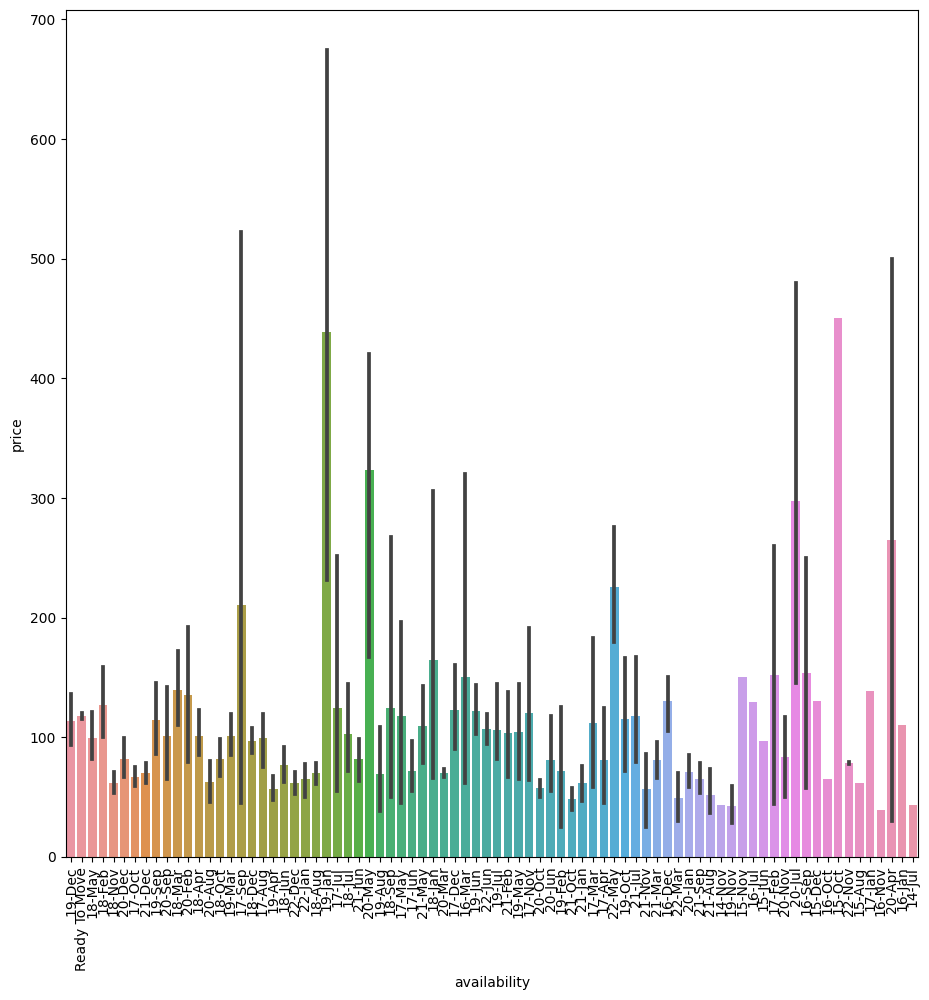

In [30]:
plt.figure(figsize=(11,11))
sns.barplot(data=df,x='availability',y='price')
plt.xticks(rotation=90)
plt.show()


* Dropping avaliability feature because we have most of the data i.e around 10000 datapoints with ready to move in feature 

In [32]:
df.drop(columns='availability',inplace = True)

In [33]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,No. of Bedrooms
0,2.0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,3.0,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,1.0,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,2.0,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,2.0,Kothanur,1200.0,2.0,1.0,51.00,2


In [52]:
df1 = pd.DataFrame(df['location'].value_counts())
df1.reset_index()

,location,count
0,Whitefield,510
1,Sarjapur Road,368
2,Electronic City,286
3,Kanakpura Road,238
4,Thanisandra,226
...,...,...
1286,Okalipura,1
1287,Old Town,1
1288,Vasantapura main road,1
1289,Bapuji Layout,1


* There is relation betweeen location and price therefore we target based encoding to encode location feature

In [67]:
mean_price = df.groupby('location')['price'].median().to_dict()
df['location'] = df['location'].map(mean_price)

In [70]:
df.columns

Index(['area_type', 'location', 'total_sqft', 'bath', 'balcony', 'price',
       'No. of Bedrooms'],
      dtype='object')

In [71]:
X = df[['area_type', 'location', 'total_sqft', 'bath', 'balcony','No. of Bedrooms']]
Y = df['price']

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [77]:
from sklearn.svm import SVR
regg = SVR()

In [78]:
regg.fit(X_train,Y_train)

SVR()

In [79]:
Y_pred = regg.predict(X_test)

In [80]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred)
print(score)

0.3338208464420187


In [83]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(Y_test,Y_pred)
print(mse)
mae = mean_absolute_error(Y_test,Y_pred)
print(mae)

14655.955324555047
42.53655043797103


In [99]:
Y_pred_1 = regg_1.predict(X_test)

In [100]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred_1)
print(score)

0.2991637980748709


#### Answer_1

r_2 score

#### Answer_2

MSE i.e Mean Square Error

#### Answer_3

MAE i.e Mean Absolute Error

#### Answer_4

RMSE i.e Root Mean Square Error

#### Answer_5

R2 i.e. R_squared